# This file is a beginning file to learn how to use FlyWire
Specifically I am figuring out 

In [28]:
import caveclient
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [14]:
client = caveclient.CAVEclient()
client.auth.setup_token(make_new=True)

New Tokens need to be acquired by hand. Please follow the following steps:
                1) Go to: https://global.daf-apis.com/auth/api/v1/create_token to create a new token.
                2) Log in with your Google credentials and copy the token shown afterward.
                3a) Save it to your computer with: client.auth.save_token(token="PASTE_YOUR_TOKEN_HERE")
                or
                3b) Set it for the current session only with client.auth.token = "PASTE_YOUR_TOKEN_HERE"
                Note: If you need to save or load multiple tokens, please read the documentation for details.
                Warning! Creating a new token by finishing step 2 will invalidate the previous token!


In [15]:
my_token = "b62b06a56a9f2dbf1c89cfe1def3908c"
client.auth.save_token(my_token, overwrite=True)

In [16]:
datastack_name = "flywire_fafb_public"
client = caveclient.CAVEclient(datastack_name)

Using client.materialize."something" gives you access to the different datastacks available to the public. The options are all below

In [17]:
client.materialize.get_tables()

['hierarchical_neuron_annotations',
 'neuron_information_v2',
 'synapses_nt_v1',
 'nuclei_v1',
 'proofread_neurons',
 'fly_synapses_neuropil_v6']

In [18]:
# Get information about a specific neuron
neuron_id = '720575940625741287'
neuron_info = client.materialize.query_table('proofread_neurons', filter_in_dict={'pt_root_id': [neuron_id]})

# Print the neuron information
neuron_info

,id,created,superceded_id,valid,pt_supervoxel_id,pt_root_id,pt_position
0,31888,2023-06-19 06:44:57.359605+00:00,NaN,t,80011186477400966,720575940625741287,"[546376, 140282, 82218]"


## Here is how to get pre-syn and post-syn for a root id


Using client.materialize.query_view(datastack_name, filter_in_dict={key for pre or post root: neuron id})

In [19]:
presyn_df = client.materialize.query_view("valid_synapses_nt_np_v6", filter_in_dict={"pre_pt_root_id": [neuron_id]})
postsyn_df = client.materialize.query_view("valid_synapses_nt_np_v6", filter_in_dict={"post_pt_root_id": [neuron_id]})


In [20]:
presyn_df

,id,pre_pt_root_id,post_pt_root_id,connection_score,cleft_score,gaba,ach,glut,oct,ser,da,valid_nt,pre_pt_supervoxel_id,post_pt_supervoxel_id,neuropil,pre_pt_position,post_pt_position
0,61022,720575940625741287,720575940591578492,140.130280,94,0.758088,2.097867e-04,0.241686,2.755431e-06,8.096993e-06,4.995630e-06,t,78603261837788381,78603261837776091,MB_VL_L,"[462940, 106056, 75440]","[463064, 106120, 75440]"
1,555438,720575940625741287,720575940624882190,316.927124,90,0.752001,1.454106e-02,0.142937,1.170547e-03,2.481711e-02,6.453354e-02,t,80432986625309440,80432986625314900,SMP_R,"[570916, 114224, 74000]","[570784, 114188, 73960]"
2,462910,720575940625741287,720575940430123252,104.165756,134,0.454340,4.178182e-01,0.119349,3.609612e-03,4.116109e-04,4.471010e-03,t,80362824039593135,80362824039595857,SMP_R,"[565112, 127588, 74720]","[565236, 127628, 74720]"
3,562113,720575940625741287,720575940489775777,99.570541,141,0.995991,9.949700e-07,0.004008,7.746936e-09,1.377258e-07,3.198715e-07,t,78603399276758803,78603399276757641,SMP_L,"[463192, 114876, 75520]","[463260, 114992, 75520]"
4,60476,720575940625741287,720575940639369587,144.125671,112,0.018716,7.739195e-05,0.981126,3.134027e-06,7.234922e-05,5.294174e-06,t,78532893093597707,78532893093613791,MB_VL_L,"[461724, 106168, 75000]","[461616, 106200, 74960]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44433,13492523,720575940625741287,720575940625794393,55.112518,142,0.872210,1.162106e-02,0.112650,9.458330e-04,5.413184e-04,2.031955e-03,t,79729574061175749,79729574061161151,SMP_R,"[531676, 131168, 64480]","[531600, 131068, 64440]"
44434,175606376,720575940625741287,720575940625794393,721.759583,142,0.995539,4.809991e-04,0.003962,4.251632e-08,5.766087e-07,1.780776e-05,t,80222086416860319,80222086416848734,SMP_R,"[558972, 126868, 39160]","[558856, 126844, 39160]"
44435,23501156,720575940625741287,720575940628347654,206.864136,136,0.999439,3.509931e-05,0.000514,1.855025e-09,1.735229e-06,1.025995e-05,t,80503492741642005,80503492741634491,SMP_R,"[574928, 121352, 61680]","[574996, 121464, 61720]"
44436,803152,720575940625741287,720575940628347654,147.973969,143,0.553711,7.555807e-03,0.420485,3.320155e-04,2.242881e-03,1.567351e-02,t,80222292709695607,80222292709668144,SMP_R,"[560044, 139896, 74280]","[560064, 140012, 74240]"


In [21]:
postsyn_df

,id,pre_pt_root_id,post_pt_root_id,connection_score,cleft_score,gaba,ach,glut,oct,ser,da,valid_nt,pre_pt_supervoxel_id,post_pt_supervoxel_id,neuropil,pre_pt_position,post_pt_position
0,1107766,720575940618216862,720575940625741287,645.536072,53,0.000211,0.969022,0.000002,0.024261,1.685696e-07,6.504103e-03,t,78603330557224667,78603330557232352,SMP_L,"[465596, 111768, 74120]","[465592, 111664, 74120]"
1,37412,720575940625069701,720575940625741287,378.112244,145,0.001560,0.952661,0.000014,0.000008,5.452095e-04,4.521220e-02,t,79236855413264158,79236855413262971,SMP_L,"[500224, 125272, 74760]","[500240, 125404, 74760]"
2,162899567,720575940622044394,720575940625741287,383.853638,145,0.001559,0.984942,0.000204,0.011621,4.776173e-05,1.626880e-03,t,79025886686884302,79025886686890382,SMP_L,"[487548, 132804, 97680]","[487620, 132760, 97640]"
3,27372585,720575940606694758,720575940625741287,420.387146,158,0.016603,0.898141,0.020845,0.006305,1.004579e-03,5.710154e-02,t,79870517708075822,79870517708069429,SMP_R,"[537660, 144044, 68800]","[537648, 144136, 68800]"
4,205820518,720575940616657989,720575940625741287,87.057762,131,0.027701,0.768111,0.107262,0.009721,4.613834e-03,8.259126e-02,t,80504386228414394,80504386228409515,CRE_R,"[575856, 175840, 83440]","[575872, 175808, 83480]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5621,143787941,720575940638336419,720575940625741287,387.531372,144,0.005318,0.935941,0.000235,0.006979,1.881326e-04,5.133953e-02,t,79801248744073258,79801248744078810,IB_R,"[535940, 210552, 154680]","[535860, 210648, 154680]"
5622,13550200,720575940611812050,720575940625741287,269.759583,156,0.032695,0.898178,0.021580,0.000929,2.264726e-03,4.435314e-02,t,79729780219576838,79729780219574163,SMP_R,"[528584, 145512, 64400]","[528476, 145520, 64400]"
5623,139747,720575940609462626,720575940625741287,396.999634,148,0.001751,0.949946,0.000030,0.015909,1.323399e-05,3.235031e-02,t,80293760965493845,80293760965497412,LAL_R,"[563748, 205072, 74760]","[563720, 205168, 74760]"
5624,15574871,720575940624799490,720575940625741287,105.699211,144,0.988857,0.000072,0.011063,0.000008,2.769553e-08,4.002641e-07,t,80645467180211224,80645467180210038,CRE_R,"[583440, 195132, 50760]","[583444, 195216, 50720]"


Here is how to get the distribution of pre- and post-synaptic partner types for a single neuron

Using the "hierarchical_neuron_annotations" datastack and filtering for super class

In [22]:
super_class_annos_df = client.materialize.query_table("hierarchical_neuron_annotations", filter_equal_dict={"classification_system": "super_class"})
unique_super_class = super_class_annos_df["cell_type"].unique()

Then we copy the super_class_annos_df columns: pt_root_id, and celltype, twice. Once for pre and one for post

In [24]:
pre_super = super_class_annos_df[["pt_root_id", "cell_type"]].rename(columns={"pt_root_id": "pre_pt_root_id", "cell_type": "pre_cell_type"})
post_super = super_class_annos_df[["pt_root_id", "cell_type"]].rename(columns={"pt_root_id": "post_pt_root_id", "cell_type": "post_cell_type"})


In [25]:
pre_super

,pre_pt_root_id,pre_cell_type
0,720575940628372613,motor
1,720575940620156283,descending
2,720575940640372277,central
3,720575940634601954,central
4,720575940624155416,central
...,...,...
139250,720575940626100238,optic
139251,720575940626915216,optic
139252,720575940645731620,optic
139253,720575940629075755,optic


Then you would get the pre and post synpases for the neuron (oviINr) but we already did that so the steps are above. We take those dataframes and merge them onto the pre_super and post_super dfs

In [26]:
pre_syn_super = pd.merge(presyn_df, post_super, on="post_pt_root_id")
post_syn_super = pd.merge(postsyn_df, pre_super, on="pre_pt_root_id")

In [27]:
pre_syn_super

,id,pre_pt_root_id,post_pt_root_id,connection_score,cleft_score,gaba,ach,glut,oct,ser,da,valid_nt,pre_pt_supervoxel_id,post_pt_supervoxel_id,neuropil,pre_pt_position,post_pt_position,post_cell_type
0,555438,720575940625741287,720575940624882190,316.927124,90,0.752001,0.014541,0.142937,1.170547e-03,2.481711e-02,6.453354e-02,t,80432986625309440,80432986625314900,SMP_R,"[570916, 114224, 74000]","[570784, 114188, 73960]",central
1,60476,720575940625741287,720575940639369587,144.125671,112,0.018716,0.000077,0.981126,3.134027e-06,7.234922e-05,5.294174e-06,t,78532893093597707,78532893093613791,MB_VL_L,"[461724, 106168, 75000]","[461616, 106200, 74960]",central
2,135168675,720575940625741287,720575940622962440,596.724976,138,0.762121,0.001966,0.235664,1.220062e-05,2.158703e-05,2.156714e-04,t,78884805533671624,78884805533663526,SMP_L,"[479256, 112392, 65640]","[479296, 112312, 65600]",central
3,222480486,720575940625741287,720575940631631929,76.935661,80,0.992226,0.006222,0.000143,9.027878e-04,6.405648e-05,4.427500e-04,t,80573930406332504,80573930406336173,SMP_R,"[577792, 125672, 114480]","[577712, 125600, 114480]",central
4,172432842,720575940625741287,720575940610649294,329.510895,157,0.999765,0.000008,0.000227,3.638655e-11,3.143606e-10,1.085419e-07,t,79870655147128825,79870655147116526,CRE_R,"[536720, 153180, 71360]","[536716, 153040, 71360]",central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16469,13492523,720575940625741287,720575940625794393,55.112518,142,0.872210,0.011621,0.112650,9.458330e-04,5.413184e-04,2.031955e-03,t,79729574061175749,79729574061161151,SMP_R,"[531676, 131168, 64480]","[531600, 131068, 64440]",central
16470,175606376,720575940625741287,720575940625794393,721.759583,142,0.995539,0.000481,0.003962,4.251632e-08,5.766087e-07,1.780776e-05,t,80222086416860319,80222086416848734,SMP_R,"[558972, 126868, 39160]","[558856, 126844, 39160]",central
16471,23501156,720575940625741287,720575940628347654,206.864136,136,0.999439,0.000035,0.000514,1.855025e-09,1.735229e-06,1.025995e-05,t,80503492741642005,80503492741634491,SMP_R,"[574928, 121352, 61680]","[574996, 121464, 61720]",central
16472,803152,720575940625741287,720575940628347654,147.973969,143,0.553711,0.007556,0.420485,3.320155e-04,2.242881e-03,1.567351e-02,t,80222292709695607,80222292709668144,SMP_R,"[560044, 139896, 74280]","[560064, 140012, 74240]",central


<Axes: xlabel='post_cell_type', ylabel='count'>

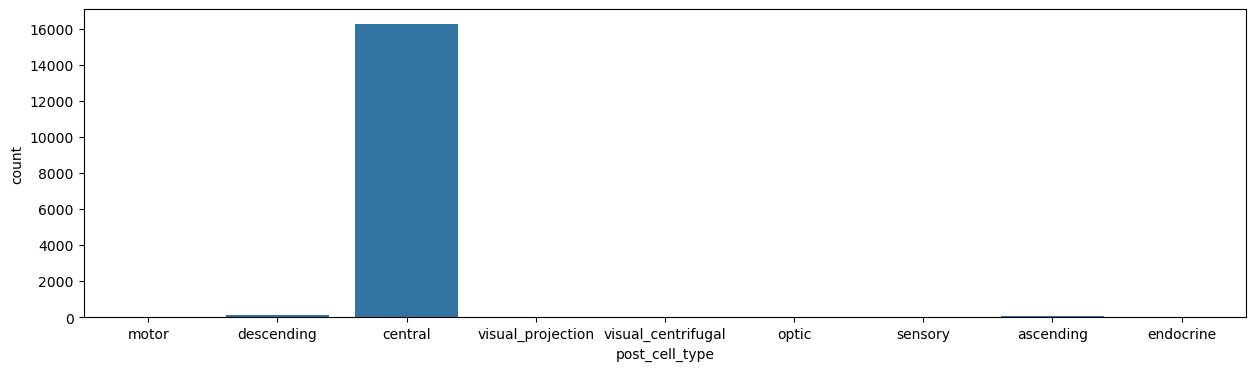

In [32]:
plt.subplots(figsize=(15, 4))
sns.countplot(pre_syn_super, x="post_cell_type", order=unique_super_class)

<Axes: xlabel='pre_cell_type', ylabel='count'>

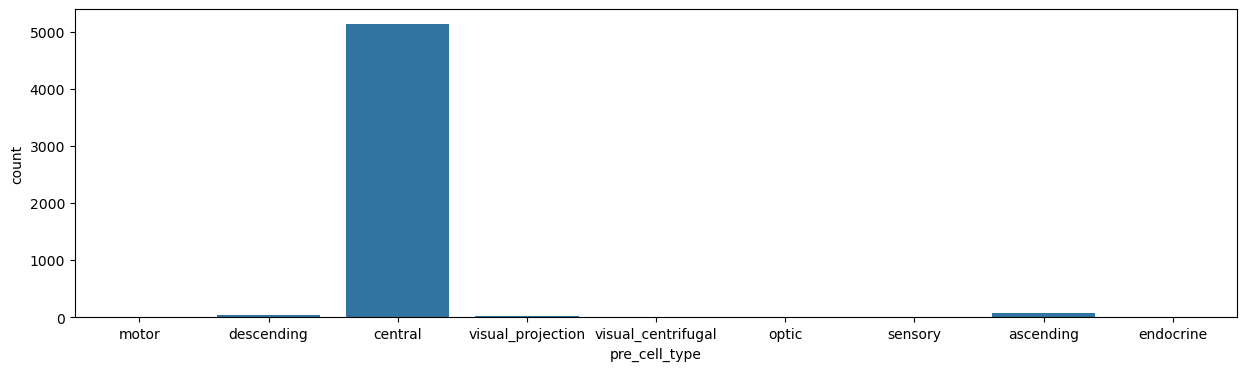

In [33]:
plt.subplots(figsize=(15, 4))
sns.countplot(post_syn_super, x="pre_cell_type", order=unique_super_class)